In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB
None


<BarContainer object of 12 artists>

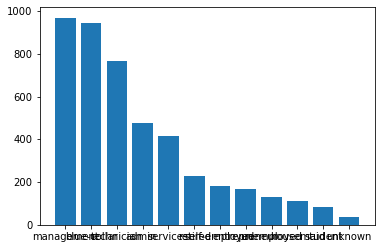

In [8]:
#Fazendo o carregamento dos dados diretamente do UCI Machine Learning  
      
dataset = pd.read_csv('./bank.csv', ';')
#Copy of the dataset to to manipulate it 
dataset_cpy = dataset.copy()
#saving the labels
labels = dataset_cpy.loc[:, "y"]
#drops the duration table
dataset_cpy = dataset_cpy.drop(['duration', 'y'], axis=1)
print(dataset_cpy.info())
#Plotagem dos dados categoricos da feature job para visualização
plt.bar(dataset_cpy.job.value_counts().index, dataset_cpy.job.value_counts().values)

In [9]:
counter_no = 0
counter_yes = 0
for entry in labels.values:
  if entry == 'no':
    counter_no +=1
  else:
    counter_yes += 1

print('yes: {}\nno: {}'.format(counter_yes, counter_no))

yes: 521
no: 4000


In [14]:
#label encoder para transformar variáveis categóricas em números
labelEncoder = LabelEncoder()

label_job = labelEncoder.fit_transform(dataset_cpy.job)
label_marital = labelEncoder.fit_transform(dataset_cpy.marital)
label_education = labelEncoder.fit_transform(dataset_cpy.education)
label_default = labelEncoder.fit_transform(dataset_cpy.default)
label_housing = labelEncoder.fit_transform(dataset_cpy.housing)
label_loan = labelEncoder.fit_transform(dataset_cpy.loan)
label_contact = labelEncoder.fit_transform(dataset_cpy.contact)
label_month = labelEncoder.fit_transform(dataset_cpy.month)
label_poutcome = labelEncoder.fit_transform(dataset_cpy.poutcome)
label_day_of_week = labelEncoder.fit_transform(dataset_cpy.day)

labels_1 = labelEncoder.fit_transform(labels)

dataset_cpy['job'] = label_job
dataset_cpy['marital'] = label_marital
dataset_cpy['education'] = label_education
dataset_cpy['default'] = label_default
dataset_cpy['housing'] = label_housing
dataset_cpy['loan'] = label_loan
dataset_cpy['contact'] = label_contact
dataset_cpy['month'] = label_month
dataset_cpy['poutcome'] = label_poutcome
dataset_cpy['day'] = label_day_of_week


#Iniciando a codificação dos dados utilizando a função dummies do pandas

labelsJob = pd.get_dummies(dataset_cpy['job'], drop_first = True)
pd.concat([dataset_cpy, labelsJob], axis=1)
labelMarital = pd.get_dummies(dataset_cpy['marital'], drop_first = True)
pd.concat([dataset_cpy, labelMarital], axis=1)
labelEducation = pd.get_dummies(dataset_cpy['education'], drop_first = True)
pd.concat([dataset_cpy, labelEducation], axis=1)
labelDefault = pd.get_dummies(dataset_cpy['default'], drop_first = True)
pd.concat([dataset_cpy, labelDefault], axis=1)
labelHousing = pd.get_dummies(dataset_cpy['housing'], drop_first = True)
pd.concat([dataset_cpy, labelHousing], axis=1)
labelLoan = pd.get_dummies(dataset_cpy['loan'])
pd.concat([dataset_cpy, labelLoan], axis=1)
labelContact = pd.get_dummies(dataset_cpy['contact'], drop_first = True)
pd.concat([dataset_cpy, labelContact], axis=1)
labelMonth = pd.get_dummies(dataset_cpy['month'])
pd.concat([dataset_cpy, labelMonth], axis=1)
labelPoutcome = pd.get_dummies(dataset_cpy['poutcome'], drop_first = True)
pd.concat([dataset_cpy, labelPoutcome], axis=1)
labelDayOfWeek = pd.get_dummies(dataset_cpy['day'], drop_first = True)
pd.concat([dataset_cpy, labelDayOfWeek], axis = 1)

print(dataset_cpy.head(10))

#Aplicando a normalização nos dados
for col in dataset_cpy.columns:
   dataset_cpy[col] = (dataset_cpy[col] - dataset_cpy[col].min()) / (dataset_cpy[col].max() - dataset_cpy[col].min())

print(dataset_cpy.head(10))


   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   
5   35    4        2          2        0      747        0     0        0   
6   36    6        1          2        0      307        1     0        0   
7   39    9        1          1        0      147        1     0        0   
8   41    2        1          2        0      221        1     0        2   
9   43    7        1          0        0      -88        1     1        0   

   day  month  campaign  pdays  previous  poutcome  
0   18     10         1     -1         0         3  
1   10      8         1    339         4      

In [16]:
#Realizando a divisão dos dados
X = dataset_cpy.values
Y = labels_1

print(X.shape)
X_new = SelectKBest(chi2, k=5).fit_transform(X, Y)
'''
svc = SVC(C=1, random_state=10, kernel='poly', gamma=1, degree=3)

# test_score, train_score, fit_time, score_time, estimator
a = cross_validate(svc,
                  X,
                  Y,
                  cv=RepeatedKFold(n_splits=5, n_repeats=10),
                  return_train_score=True,
                  n_jobs=1,
                  )
'''


print(X_new.shape)

(4521, 15)
(4521, 5)


In [17]:
#Realizando a divisão dos dados
X = dataset_cpy.values
Y = labels_1

#Separação dos dados em treinamento e validação
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=10)

clf = SVC()

clf.fit(X_train, Y_train)

kernels_range = ['linear', 'poly', 'rbf', 'sigmoid']
c_range = [1*(10**(-4+x)) for x in range(7)] # 0.001 [1,2,3,4,5]
degree_range = [2+x for x in range(7)] # for polynomial kernel  
gamma_range = [1/(10**x) for x in range(5)] #['auto', 'scale']

k_scores_train = []
k_scores_valid = []

results_tuples = []

# use iteration to caclulator different kernels in models, then return the average accuracy based on the cross validation

for kernel_entry in kernels_range:
  print('kernel: {}'.format(kernel_entry))
  for c_entry in c_range:
    print('.c: {}'.format(c_entry))
    for gamma_entry in gamma_range:
      print('..gamma: {}'.format(gamma_entry))
      svc = ''
      if kernel_entry == 'poly':
        for degree_entry in degree_range:
          print('...degree: {}'.format(degree_entry))
          svc = SVC(C=c_entry, random_state=10, kernel=kernel_entry, gamma=gamma_entry, degree=degree_entry)
          results = cross_validate(svc,
                                   X_new,
                                   Y,
                                   cv=RepeatedKFold(n_splits=5, n_repeats=10),
                                   return_train_score=True,
                                   n_jobs=-1,
                                   )
          results_tuples.append(
              (kernel_entry,
               c_entry,
               gamma_entry,
               degree_entry,
               results['train_score'].mean(),
               results['test_score'].mean(),
               results['fit_time'].mean(),
               results['score_time'].mean()
              )
          )
          '''
          scores = cross_val_score(svc, X_train, Y_train, cv=5, scoring='accuracy')
          #k_scores_train.append(scores.mean())
          svc.fit(X_train, Y_train)
          validation_score = svc.score(X_valid, Y_valid)
          results_tuples.append((kernel_entry, c_entry, gamma_entry, degree_entry, scores.mean(), validation_score))
          '''
      else:
        svc = SVC(C=c_entry, random_state=10, kernel=kernel_entry, gamma=gamma_entry)
        degree_entry = -1
        results = cross_validate(svc,
                                   X_new,
                                   Y,
                                   cv=RepeatedKFold(n_splits=5, n_repeats=10),
                                   return_train_score=True,
                                   n_jobs=-1,
                                   )
        results_tuples.append(
            (kernel_entry,
             c_entry,
             gamma_entry,
             degree_entry,
             results['train_score'].mean(),
             results['test_score'].mean(),
             results['fit_time'].mean(),
             results['score_time'].mean()
            )
        )
        '''
        scores = cross_val_score(svc, X_train, Y_train, cv=5, scoring='accuracy')
        k_scores_train.append(scores.mean())
        svc.fit(X_train, Y_train)
        validation_score = svc.score(X_valid, Y_valid)
        results_tuples.append((kernel_entry, c_entry, gamma_entry, -1, scores.mean(), validation_score))
        '''
    
print(results_tuples)

kernel: linear
.c: 0.0001
..gamma: 1.0
..gamma: 0.1
..gamma: 0.01
..gamma: 0.001
..gamma: 0.0001
.c: 0.001
..gamma: 1.0
..gamma: 0.1
..gamma: 0.01
..gamma: 0.001
..gamma: 0.0001
.c: 0.01
..gamma: 1.0
..gamma: 0.1
..gamma: 0.01
..gamma: 0.001
..gamma: 0.0001
.c: 0.1
..gamma: 1.0
..gamma: 0.1
..gamma: 0.01
..gamma: 0.001
..gamma: 0.0001
.c: 1
..gamma: 1.0
..gamma: 0.1
..gamma: 0.01
..gamma: 0.001
..gamma: 0.0001
.c: 10
..gamma: 1.0
..gamma: 0.1
..gamma: 0.01
..gamma: 0.001
..gamma: 0.0001
.c: 100
..gamma: 1.0
..gamma: 0.1
..gamma: 0.01
..gamma: 0.001
..gamma: 0.0001
kernel: poly
.c: 0.0001
..gamma: 1.0
...degree: 2
...degree: 3
...degree: 4
...degree: 5
...degree: 6
...degree: 7
...degree: 8
..gamma: 0.1
...degree: 2
...degree: 3
...degree: 4
...degree: 5
...degree: 6
...degree: 7
...degree: 8
..gamma: 0.01
...degree: 2
...degree: 3
...degree: 4
...degree: 5
...degree: 6
...degree: 7
...degree: 8
..gamma: 0.001
...degree: 2
...degree: 3
...degree: 4
...degree: 5
...degree: 6
...degree: 7

No handles with labels found to put in legend.


['1: sigmoid', '2: rbf', '3: poly', '4: poly', '5: poly']
[0.8847618442282307, 0.884761721996773, 0.8847616242116071, 0.8847615508727326, 0.8847613553024007]


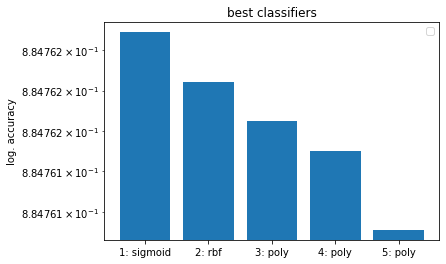

best classifier parameters: ('sigmoid', 10, 0.0001, -1, 0.8847601236540331, 0.8847618442282307, 0.20310436725616454, 0.04872228622436523)


In [18]:
best_results = sorted(results_tuples, key=lambda tup: tup[5], reverse=True)[:5]
worst_results = sorted(results_tuples, key=lambda tup: tup[5])[:5]
xbar = []
ybar = []
i = 1
for entry in best_results:
  xbar.append('{}: {}'.format(i, entry[0]))
  ybar.append(entry[5])
  i += 1

print(xbar)
print(ybar)


plt.figure()
plt.bar(xbar, ybar)
plt.ylabel('log. accuracy')
plt.yscale('log')
plt.title('best classifiers')
plt.legend()
plt.show()

print('best classifier parameters: {}'.format(best_results[0]))

No handles with labels found to put in legend.


['5: sigmoid', '4: sigmoid', '3: sigmoid', '2: poly', '1: poly']
[0.8504768004693688, 0.861601843250379, 0.8732141495135188, 0.8833660343225932, 0.8834543343274827]


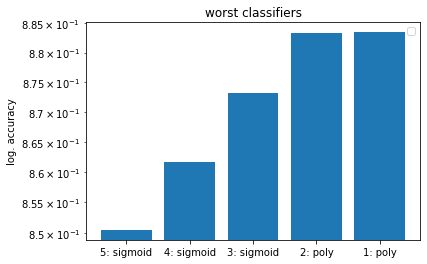

worst classifier parameters: ('sigmoid', 100, 1.0, -1, 0.8497789506778463, 0.8504768004693688, 0.2495479679107666, 0.04843616962432861)


In [19]:
xbar = []
ybar = []
i = 5
for entry in worst_results:
  xbar.append('{}: {}'.format(i, entry[0]))
  ybar.append(entry[5])
  i -= 1

print(xbar)
print(ybar)


plt.figure()
plt.bar(xbar, ybar)
plt.ylabel('log. accuracy')
plt.yscale('log')
plt.title('worst classifiers')
plt.legend()
plt.show()

print('worst classifier parameters: {}'.format(worst_results[0]))

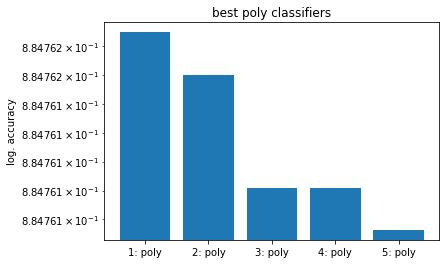

best poly classifier parameters: ('poly', 0.01, 0.0001, 7, 0.8847601098915887, 0.8847616242116071, 0.15804904460906982, 0.034817047119140625)




In [22]:
linear_list = []
rbf_list = []
sigmoid_list = []
poly_list = []
for entry in results_tuples:
  if entry[0] == 'linear':
    linear_list.append(entry)
  if entry[0] == 'rbf':
    rbf_list.append(entry)
  if entry[0] == 'sigmoid':
    sigmoid_list.append(entry)
  if entry[0] == 'poly':
    poly_list.append(entry)
  


best_linears = sorted(linear_list, key=lambda tup: tup[5], reverse=True)[:5]
best_rbf = sorted(rbf_list, key=lambda tup: tup[5], reverse=True)[:5]
best_sigmoid = sorted(sigmoid_list, key=lambda tup: tup[5], reverse=True)[:5]
best_poly = sorted(poly_list, key=lambda tup: tup[5], reverse=True)[:5]
#print(best_linears)

all = [(best_linears, 'linear'), (best_rbf, 'rbf'), (best_sigmoid, 'sigmoid'), (best_poly, 'poly')]
 
for item, name in all:
  xbar = []
  ybar = []
  i = 1
  for entry in item:
    xbar.append('{}: {}'.format(i, entry[0]))
    ybar.append(entry[5])
    i += 1

  #print(xbar)
  #print(ybar)


plt.figure()
plt.bar(xbar, ybar)
plt.ylabel('log. accuracy')
plt.yscale('log')
plt.title('best {} classifiers'.format(name))
plt.show()

print('best {} classifier parameters: {}\n\n'.format(name, item[0]))

[('sigmoid', 0.0001, 1.0, -1, 0.8847600135544786, 0.8847600840952429, 0.33998592376708986, 0.06942132949829101), ('sigmoid', 0.0001, 0.1, -1, 0.8847599692088245, 0.8847593751527892, 0.20998543739318848, 0.04790106773376465), ('sigmoid', 0.0001, 0.01, -1, 0.8847600043795157, 0.8847599374174938, 0.2000707769393921, 0.04703074932098389), ('sigmoid', 0.0001, 0.001, -1, 0.8847599508588989, 0.8847590817972913, 0.20602418899536132, 0.048497977256774905), ('sigmoid', 0.0001, 0.0001, -1, 0.8847600043795155, 0.8847599374174938, 0.20833237171173097, 0.049597554206848145), ('sigmoid', 0.001, 1.0, -1, 0.8847599982628738, 0.8847598396323277, 0.2582314348220825, 0.05327580451965332), ('sigmoid', 0.001, 0.1, -1, 0.8847599890879106, 0.884759692954579, 0.2109958267211914, 0.04869439125061035), ('sigmoid', 0.001, 0.01, -1, 0.8847600380210462, 0.8847604752359068, 0.20508698463439942, 0.04897894382476806), ('sigmoid', 0.001, 0.001, -1, 0.8847600548418114, 0.8847607441451132, 0.21505888938903808, 0.05144880

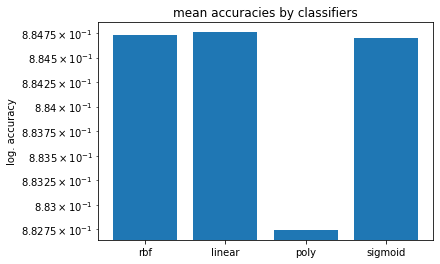

In [23]:
linear_aux_list = []
rbf_aux_list = []
sigmoid_aux_list = []
poly_aux_list = []
print(sigmoid_list)
for entry in rbf_list:
  rbf_aux_list.append(entry[5])

for entry in linear_list:
  linear_aux_list.append(entry[5])

for entry in sigmoid_list:
  sigmoid_aux_list.append(entry[5])

for entry in poly_list:
  poly_aux_list.append(entry[5])


rbf_mean_acc = np.mean(rbf_aux_list)
linear_mean_acc = np.mean(linear_aux_list)
sigmoid_mean_acc = np.mean(sigmoid_aux_list)
poly_mean_acc = np.mean(poly_aux_list)

mean_x_bar = ['rbf', 'linear', 'poly', 'sigmoid']
mean_y_bar = [rbf_mean_acc, linear_mean_acc, sigmoid_mean_acc, poly_mean_acc]

plt.figure()
plt.bar(mean_x_bar, mean_y_bar)
plt.ylabel('log. accuracy')
plt.yscale('log')
plt.title('mean accuracies by classifiers')
plt.show()

[[('sigmoid', 0.0001, 1.0, -1, 0.8847600135544786, 0.8847600840952429, 0.33998592376708986, 0.06942132949829101), ('sigmoid', 0.001, 1.0, -1, 0.8847599982628738, 0.8847598396323277, 0.2582314348220825, 0.05327580451965332), ('sigmoid', 0.01, 1.0, -1, 0.8847599952045527, 0.8847597907397448, 0.2567931079864502, 0.05063880443572998), ('sigmoid', 0.1, 1.0, -1, 0.8832890911526445, 0.8836325233462083, 0.2720500087738037, 0.05144111156463623), ('sigmoid', 1, 1.0, -1, 0.8736619601146013, 0.8732141495135188, 0.2606146192550659, 0.05022679328918457), ('sigmoid', 10, 1.0, -1, 0.8622425902999845, 0.861601843250379, 0.26446704387664793, 0.04850507736206055), ('sigmoid', 100, 1.0, -1, 0.8497789506778463, 0.8504768004693688, 0.2495479679107666, 0.04843616962432861)], [('sigmoid', 0.0001, 0.1, -1, 0.8847599692088245, 0.8847593751527892, 0.20998543739318848, 0.04790106773376465), ('sigmoid', 0.001, 0.1, -1, 0.8847599890879106, 0.884759692954579, 0.2109958267211914, 0.04869439125061035), ('sigmoid', 0.0

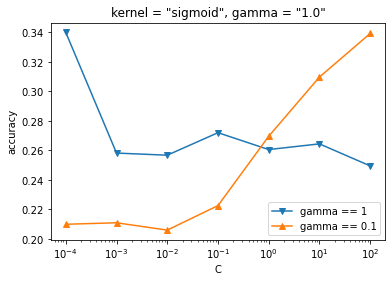

In [24]:
sigmoid_fixed_gamma = []
for gamma in gamma_range:
  aux_list = []
  for entry in sigmoid_list:
    if entry[2] == gamma:
      aux_list.append(entry)
  sigmoid_fixed_gamma.append(aux_list)

print(sigmoid_fixed_gamma)

x_values = []
y_train_values = []
y_test_values = []
for entry in sigmoid_fixed_gamma[0]:
  x_values.append(entry[1])
  y_train_values.append(entry[6])
  y_test_values.append(entry[5])

#x_values = []
#y_train_values = []
y_test_values = []
for entry in sigmoid_fixed_gamma[1]:
  #x_values.append(entry[1])
  #y_train_values.append(entry[6])
  y_test_values.append(entry[6])

print(x_values)
print(y_test_values)
print(y_train_values)

plt.figure()
plt.plot(x_values, y_train_values, marker='v', label='gamma == 1')
plt.plot(x_values, y_test_values, marker='^', label='gamma == 0.1')
plt.title('kernel = "sigmoid", gamma = "1.0"')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.xscale('log')
plt.legend()
plt.show()